In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
from typing import *
import torch

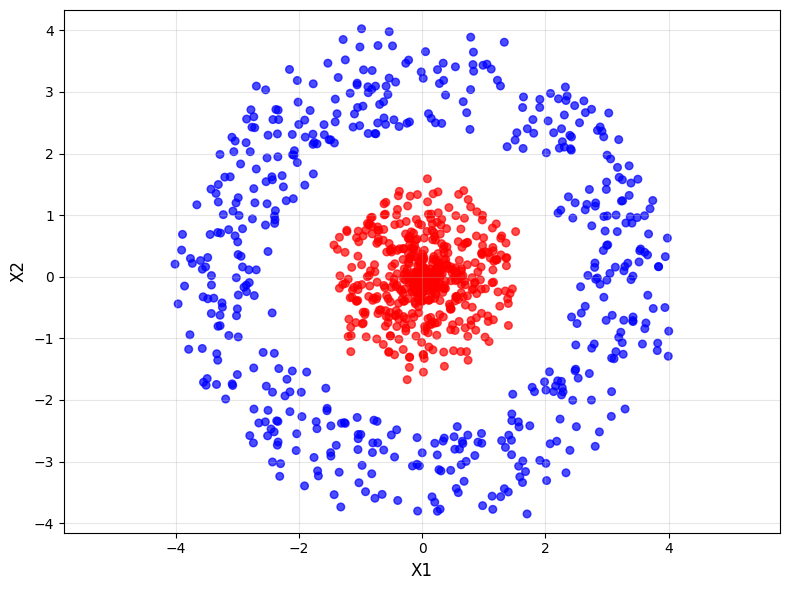

In [39]:
np.random.seed(42)

n_samples = 1000

def make_circles(n_samples):
    n_inner = n_samples // 2
    n_outer = n_samples // 2
    
    # Inner circle (class 0)
    theta_inner = np.random.uniform(0, 2*np.pi, n_inner)
    r_inner = np.random.uniform(0.0, 1.5, n_inner)
    x_inner = r_inner * np.cos(theta_inner) + np.random.normal(0, 0.1, n_inner)
    y_inner = r_inner * np.sin(theta_inner) + np.random.normal(0, 0.1, n_inner)
    
    # Outer circle (class 1)
    theta_outer = np.random.uniform(0, 2*np.pi, n_outer)
    r_outer = np.random.uniform(2.5, 4.0, n_outer)
    x_outer = r_outer * np.cos(theta_outer) + np.random.normal(0, 0.1, n_outer)
    y_outer = r_outer * np.sin(theta_outer) + np.random.normal(0, 0.1, n_outer)
    
    X = np.column_stack([np.concatenate([x_inner, x_outer]), 
                         np.concatenate([y_inner, y_outer])])
    y = np.concatenate([np.zeros(n_inner), np.ones(n_outer)])
    return X, y

# Generate the circles dataset
X, y = make_circles(n_samples)

# Create single plot
plt.figure(figsize=(8, 6))
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, s=30)
# plt.title('Concentric Circles Classification Dataset\n(Red=0, Blue=1)', fontsize=14, fontweight='bold')
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')  # Make circles look circular
plt.tight_layout()
plt.show()



In [40]:
from quickgrad import vector, optim
import quickgrad.nn as nn
from quickgrad.nn._losses import *
from quickgrad.nn.linear import Linear
import numpy as np
from quickgrad.nn._acts_modules import Sigmoid

In [41]:
in_feats, out_feats = 2, 1

# model = nn.Sequential()
# model.append(nn.Linear(in_feats, out_feats))
# model.append(nn.Sigmoid())
model = nn.Sequential(
    nn.Linear(in_feats, 5),
    nn.ReLU(),
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, out_feats),
    nn.Sigmoid()    
)

In [42]:
X, y = make_circles(100)
y = np.expand_dims(y, -1)

X_train = vector(X.tolist())
y_train = vector(y.tolist())

print("Training data: ", X_train)
print("Training data shape: ", X_train.shape)
print("Labels: ", y_train)
print("Labels shape: ", y_train.shape)

Training data:  vector(data=[[ 0.19609623  0.03585737]
 [-0.34786078  0.44264632]
 [-0.80414815 -1.05663159]
 [ 0.05421907  0.16548406]
 [ 1.01312938  1.14111427]
 [ 0.14492925 -0.1410697 ]
 [ 1.02532154 -0.4385453 ]
 [ 0.54976402 -0.51403778]
 [-1.07709965 -1.013846  ]
 [ 0.31933608 -0.58687361]
 [ 0.82852523  0.34194075]
 [-0.23340384  0.32943994]
 [-0.24706011  0.16881331]
 [-0.91412354 -0.99856916]
 [-0.31247791  0.41785467]
 [ 0.3871105   0.25946866]
 [-0.84174843 -0.44776081]
 [ 0.19409598 -0.33814861]
 [-0.86843551  0.92390144]
 [ 0.76856435  0.70738108]
 [ 0.25995469  0.88109311]
 [-0.0573472   1.32592837]
 [-0.04921402  0.10634871]
 [-0.2741702  -0.28221803]
 [-0.46585728 -0.36273341]
 [-0.06690486 -0.17638417]
 [-0.84263915  0.9053062 ]
 [ 0.63544344 -1.33741399]
 [ 0.24799147  0.74564532]
 [-0.35071685  0.26326192]
 [ 0.54253658 -1.05387529]
 [ 0.35959611  0.49170528]
 [ 0.57163797  0.49139866]
 [ 0.43159801 -0.56029496]
 [-0.62716952  1.19359957]
 [-0.47776876 -0.8356364 ]


In [43]:
lr = 0.01
epochs = 450

loss_fn = nn.BCELoss()
from quickgrad import vector, optim
opt = optim.Adam(model.parameters(), lr=lr)

In [44]:
import tqdm
import time

loop = tqdm.tqdm(range(epochs))
losses = []

bce_loss = BCELoss()

start = time.time()
for epoch in loop:
    X_train.requires_grad = False
    y_pred = model.forward(X_train)
    loss = bce_loss.forward(y_train, y_pred)
    print(loss)
    opt.zero_grad()
    loss.backward()
    opt.step()
    lossval = loss.data.item()
    losses.append(lossval)
    loop.set_postfix(loss=lossval)

end = time.time()
print(f"Finished training in {end - start} seconds...")

  4%|▎         | 16/450 [00:00<00:02, 155.43it/s, loss=7.6] 

vector(data=[[8.05921583]])
bcd
vector(data=[[8.05892733]])
bcd
vector(data=[[8.05866523]])
bcd
vector(data=[[8.05828041]])
bcd
vector(data=[[8.05764293]])
bcd
vector(data=[[8.05663754]])
bcd
vector(data=[[8.05513343]])
bcd
vector(data=[[8.0529499]])
bcd
vector(data=[[8.04983736]])
bcd
vector(data=[[8.04546032]])
bcd
vector(data=[[8.03942221]])
bcd
vector(data=[[8.03207957]])
bcd
vector(data=[[8.02380469]])
bcd
vector(data=[[8.01308548]])
bcd
vector(data=[[7.99924111]])
bcd
vector(data=[[7.98208813]])
bcd
vector(data=[[7.9616644]])
bcd
vector(data=[[7.93756685]])
bcd
vector(data=[[7.90966132]])
bcd
vector(data=[[7.87736968]])
bcd
vector(data=[[7.83931445]])
bcd
vector(data=[[7.79422026]])
bcd
vector(data=[[7.74090136]])
bcd
vector(data=[[7.67830867]])
bcd
vector(data=[[7.60498948]])
bcd


  4%|▎         | 16/450 [00:00<00:02, 155.43it/s, loss=6.72]

vector(data=[[7.52157898]])
bcd
vector(data=[[7.42597631]])
bcd
vector(data=[[7.31665006]])
bcd
vector(data=[[7.19279353]])
bcd
vector(data=[[7.05216033]])
bcd
vector(data=[[6.89298009]])
bcd
vector(data=[[6.71511573]])
bcd


 11%|█         | 48/450 [00:00<00:02, 155.47it/s, loss=0.76] 

vector(data=[[6.51719806]])
bcd
vector(data=[[6.29729597]])
bcd
vector(data=[[6.05584669]])
bcd
vector(data=[[5.79436812]])
bcd
vector(data=[[5.51269773]])
bcd
vector(data=[[5.20969505]])
bcd
vector(data=[[4.89314178]])
bcd
vector(data=[[4.56259256]])
bcd
vector(data=[[4.21810234]])
bcd
vector(data=[[3.86706092]])
bcd
vector(data=[[3.51980607]])
bcd
vector(data=[[3.18294502]])
bcd
vector(data=[[2.85621973]])
bcd
vector(data=[[2.55395375]])
bcd
vector(data=[[2.27810459]])
bcd
vector(data=[[2.02855527]])
bcd
vector(data=[[1.80532042]])
bcd
vector(data=[[1.60665768]])
bcd
vector(data=[[1.4287656]])
bcd
vector(data=[[1.27018269]])
bcd
vector(data=[[1.1286381]])
bcd
vector(data=[[0.99693911]])
bcd
vector(data=[[0.87516515]])
bcd
vector(data=[[0.76012771]])
bcd


 11%|█         | 48/450 [00:00<00:02, 155.47it/s, loss=0.194]

vector(data=[[0.64814544]])
bcd
vector(data=[[0.54526405]])
bcd
vector(data=[[0.45234621]])
bcd
vector(data=[[0.37058351]])
bcd
vector(data=[[0.3010246]])
bcd
vector(data=[[0.24285256]])
bcd
vector(data=[[0.19449577]])
bcd
vector(data=[[0.15477703]])
bcd


 18%|█▊        | 80/450 [00:00<00:02, 150.23it/s, loss=0.00604]

vector(data=[[0.12366425]])
bcd
vector(data=[[0.0992604]])
bcd
vector(data=[[0.07881664]])
bcd
vector(data=[[0.06291662]])
bcd
vector(data=[[0.05065986]])
bcd
vector(data=[[0.04128735]])
bcd
vector(data=[[0.03403143]])
bcd
vector(data=[[0.02830473]])
bcd
vector(data=[[0.02376784]])
bcd
vector(data=[[0.02028576]])
bcd
vector(data=[[0.01750977]])
bcd
vector(data=[[0.01530372]])
bcd
vector(data=[[0.01353141]])
bcd
vector(data=[[0.01207283]])
bcd
vector(data=[[0.01079762]])
bcd
vector(data=[[0.0097027]])
bcd
vector(data=[[0.00883226]])
bcd
vector(data=[[0.00810614]])
bcd
vector(data=[[0.00749078]])
bcd
vector(data=[[0.00696379]])
bcd
vector(data=[[0.00647078]])
bcd
vector(data=[[0.00603709]])
bcd
vector(data=[[0.00564921]])
bcd


 18%|█▊        | 80/450 [00:00<00:02, 150.23it/s, loss=0.00379]

vector(data=[[0.00529938]])
bcd
vector(data=[[0.00498179]])
bcd
vector(data=[[0.00469478]])
bcd
vector(data=[[0.00443679]])
bcd
vector(data=[[0.00420315]])
bcd
vector(data=[[0.00398827]])
bcd
vector(data=[[0.00379231]])
bcd
vector(data=[[0.0036163]])
bcd


 25%|██▍       | 112/450 [00:00<00:02, 151.28it/s, loss=0.00179]

vector(data=[[0.00345772]])
bcd
vector(data=[[0.00331412]])
bcd
vector(data=[[0.00318311]])
bcd
vector(data=[[0.00306276]])
bcd
vector(data=[[0.00295118]])
bcd
vector(data=[[0.00284695]])
bcd
vector(data=[[0.00274916]])
bcd
vector(data=[[0.00265716]])
bcd
vector(data=[[0.00257054]])
bcd
vector(data=[[0.00248899]])
bcd
vector(data=[[0.00241229]])
bcd
vector(data=[[0.00234024]])
bcd
vector(data=[[0.00227272]])
bcd
vector(data=[[0.00221002]])
bcd
vector(data=[[0.00215145]])
bcd
vector(data=[[0.00209669]])
bcd
vector(data=[[0.00204543]])
bcd
vector(data=[[0.00199719]])
bcd
vector(data=[[0.00195166]])
bcd
vector(data=[[0.00190887]])
bcd
vector(data=[[0.00186857]])
bcd
vector(data=[[0.00183004]])
bcd
vector(data=[[0.0017931]])
bcd


 25%|██▍       | 112/450 [00:00<00:02, 151.28it/s, loss=0.00157]

vector(data=[[0.00175761]])
bcd
vector(data=[[0.00172347]])
bcd
vector(data=[[0.00169059]])
bcd
vector(data=[[0.00165897]])
bcd
vector(data=[[0.00162861]])
bcd
vector(data=[[0.0015994]])
bcd
vector(data=[[0.00157125]])
bcd


 32%|███▏      | 144/450 [00:00<00:02, 152.03it/s, loss=0.00113]

vector(data=[[0.00154411]])
bcd
vector(data=[[0.00151793]])
bcd
vector(data=[[0.00149266]])
bcd
vector(data=[[0.00146825]])
bcd
vector(data=[[0.00144465]])
bcd
vector(data=[[0.00142189]])
bcd
vector(data=[[0.00139983]])
bcd
vector(data=[[0.00137846]])
bcd
vector(data=[[0.00135777]])
bcd
vector(data=[[0.00133766]])
bcd
vector(data=[[0.00131809]])
bcd
vector(data=[[0.00129904]])
bcd
vector(data=[[0.00128089]])
bcd
vector(data=[[0.00126379]])
bcd
vector(data=[[0.00124704]])
bcd
vector(data=[[0.00123064]])
bcd
vector(data=[[0.00121459]])
bcd
vector(data=[[0.00119889]])
bcd
vector(data=[[0.00118356]])
bcd
vector(data=[[0.00116857]])
bcd
vector(data=[[0.00115394]])
bcd
vector(data=[[0.00113964]])
bcd
vector(data=[[0.00112567]])
bcd


 32%|███▏      | 144/450 [00:01<00:02, 152.03it/s, loss=0.00102]

vector(data=[[0.00111201]])
bcd
vector(data=[[0.00109864]])
bcd
vector(data=[[0.00108555]])
bcd
vector(data=[[0.00107275]])
bcd
vector(data=[[0.00106022]])
bcd
vector(data=[[0.00104794]])
bcd
vector(data=[[0.00103589]])
bcd
vector(data=[[0.00102407]])
bcd


 39%|███▉      | 176/450 [00:01<00:01, 149.63it/s, loss=0.000802]

vector(data=[[0.00101246]])
bcd
vector(data=[[0.00100106]])
bcd
vector(data=[[0.00098985]])
bcd
vector(data=[[0.00097884]])
bcd
vector(data=[[0.00096802]])
bcd
vector(data=[[0.00095739]])
bcd
vector(data=[[0.00094694]])
bcd
vector(data=[[0.00093668]])
bcd
vector(data=[[0.00092659]])
bcd
vector(data=[[0.00091668]])
bcd
vector(data=[[0.00090693]])
bcd
vector(data=[[0.00089735]])
bcd
vector(data=[[0.00088793]])
bcd
vector(data=[[0.00087866]])
bcd
vector(data=[[0.00086954]])
bcd
vector(data=[[0.00086059]])
bcd
vector(data=[[0.00085185]])
bcd
vector(data=[[0.00084321]])
bcd
vector(data=[[0.00083468]])
bcd
vector(data=[[0.00082628]])
bcd
vector(data=[[0.00081799]])
bcd
vector(data=[[0.00080988]])
bcd
vector(data=[[0.00080191]])
bcd


 39%|███▉      | 176/450 [00:01<00:01, 149.63it/s, loss=0.000742]

vector(data=[[0.00079405]])
bcd
vector(data=[[0.00078628]])
bcd
vector(data=[[0.00077861]])
bcd
vector(data=[[0.00077105]])
bcd
vector(data=[[0.00076359]])
bcd
vector(data=[[0.00075629]])
bcd
vector(data=[[0.00074907]])
bcd
vector(data=[[0.00074195]])
bcd


 46%|████▌     | 208/450 [00:01<00:01, 150.52it/s, loss=0.000603]

vector(data=[[0.00073493]])
bcd
vector(data=[[0.00072803]])
bcd
vector(data=[[0.00072122]])
bcd
vector(data=[[0.00071451]])
bcd
vector(data=[[0.00070789]])
bcd
vector(data=[[0.00070136]])
bcd
vector(data=[[0.00069492]])
bcd
vector(data=[[0.00068857]])
bcd
vector(data=[[0.00068231]])
bcd
vector(data=[[0.00067612]])
bcd
vector(data=[[0.00067003]])
bcd
vector(data=[[0.00066401]])
bcd
vector(data=[[0.00065808]])
bcd
vector(data=[[0.00065223]])
bcd
vector(data=[[0.00064645]])
bcd
vector(data=[[0.00064074]])
bcd
vector(data=[[0.00063512]])
bcd
vector(data=[[0.00062956]])
bcd
vector(data=[[0.00062407]])
bcd
vector(data=[[0.00061866]])
bcd
vector(data=[[0.00061332]])
bcd
vector(data=[[0.00060804]])
bcd
vector(data=[[0.00060284]])
bcd


 46%|████▌     | 208/450 [00:01<00:01, 150.52it/s, loss=0.000563]

vector(data=[[0.0005977]])
bcd
vector(data=[[0.00059262]])
bcd
vector(data=[[0.00058761]])
bcd
vector(data=[[0.00058265]])
bcd
vector(data=[[0.00057777]])
bcd
vector(data=[[0.00057294]])
bcd
vector(data=[[0.00056816]])
bcd
vector(data=[[0.00056346]])
bcd


 53%|█████▎    | 240/450 [00:01<00:01, 151.68it/s, loss=0.000469]

vector(data=[[0.00055882]])
bcd
vector(data=[[0.00055422]])
bcd
vector(data=[[0.00054969]])
bcd
vector(data=[[0.0005452]])
bcd
vector(data=[[0.00054077]])
bcd
vector(data=[[0.00053639]])
bcd
vector(data=[[0.00053207]])
bcd
vector(data=[[0.0005278]])
bcd
vector(data=[[0.00052358]])
bcd
vector(data=[[0.00051941]])
bcd
vector(data=[[0.00051528]])
bcd
vector(data=[[0.00051121]])
bcd
vector(data=[[0.00050718]])
bcd
vector(data=[[0.0005032]])
bcd
vector(data=[[0.00049927]])
bcd
vector(data=[[0.00049538]])
bcd
vector(data=[[0.00049153]])
bcd
vector(data=[[0.00048774]])
bcd
vector(data=[[0.00048399]])
bcd
vector(data=[[0.00048027]])
bcd
vector(data=[[0.00047659]])
bcd
vector(data=[[0.00047297]])
bcd
vector(data=[[0.00046938]])
bcd


 53%|█████▎    | 240/450 [00:01<00:01, 151.68it/s, loss=0.000445]

vector(data=[[0.00046583]])
bcd
vector(data=[[0.00046231]])
bcd
vector(data=[[0.00045884]])
bcd
vector(data=[[0.00045541]])
bcd
vector(data=[[0.00045201]])
bcd
vector(data=[[0.00044865]])
bcd
vector(data=[[0.00044533]])
bcd
vector(data=[[0.00044205]])
bcd


 57%|█████▋    | 256/450 [00:01<00:01, 149.94it/s, loss=0.000378]

vector(data=[[0.0004388]])
bcd
vector(data=[[0.00043559]])
bcd
vector(data=[[0.0004324]])
bcd
vector(data=[[0.00042926]])
bcd
vector(data=[[0.00042615]])
bcd
vector(data=[[0.00042307]])
bcd
vector(data=[[0.00042003]])
bcd
vector(data=[[0.00041701]])
bcd
vector(data=[[0.00041403]])
bcd
vector(data=[[0.00041108]])
bcd
vector(data=[[0.00040816]])
bcd
vector(data=[[0.00040528]])
bcd
vector(data=[[0.00040242]])
bcd
vector(data=[[0.00039959]])
bcd
vector(data=[[0.00039679]])
bcd
vector(data=[[0.00039401]])
bcd
vector(data=[[0.00039127]])
bcd
vector(data=[[0.00038855]])
bcd
vector(data=[[0.00038587]])
bcd
vector(data=[[0.00038321]])
bcd
vector(data=[[0.00038058]])
bcd
vector(data=[[0.00037797]])
bcd
vector(data=[[0.0003754]])


 60%|██████    | 272/450 [00:01<00:01, 149.67it/s, loss=0.000356]

bcd
vector(data=[[0.00037284]])
bcd
vector(data=[[0.00037031]])
bcd
vector(data=[[0.00036781]])
bcd
vector(data=[[0.00036533]])
bcd
vector(data=[[0.00036288]])
bcd
vector(data=[[0.00036045]])
bcd
vector(data=[[0.00035804]])
bcd
vector(data=[[0.00035566]])
bcd


 64%|██████▍   | 288/450 [00:01<00:01, 150.88it/s, loss=0.000309]

vector(data=[[0.0003533]])
bcd
vector(data=[[0.00035096]])
bcd
vector(data=[[0.00034865]])
bcd
vector(data=[[0.00034636]])
bcd
vector(data=[[0.00034409]])
bcd
vector(data=[[0.00034184]])
bcd
vector(data=[[0.00033962]])
bcd
vector(data=[[0.00033742]])
bcd
vector(data=[[0.00033523]])
bcd
vector(data=[[0.00033307]])
bcd
vector(data=[[0.00033093]])
bcd
vector(data=[[0.00032881]])
bcd
vector(data=[[0.00032671]])
bcd
vector(data=[[0.00032462]])
bcd
vector(data=[[0.00032256]])
bcd
vector(data=[[0.00032052]])
bcd
vector(data=[[0.00031849]])
bcd
vector(data=[[0.00031649]])
bcd
vector(data=[[0.0003145]])
bcd
vector(data=[[0.00031253]])
bcd
vector(data=[[0.00031058]])
bcd
vector(data=[[0.00030865]])
bcd


 68%|██████▊   | 304/450 [00:02<00:00, 150.34it/s, loss=0.000292]

vector(data=[[0.00030673]])
bcd
vector(data=[[0.00030484]])
bcd
vector(data=[[0.00030296]])
bcd
vector(data=[[0.00030109]])
bcd
vector(data=[[0.00029925]])
bcd
vector(data=[[0.00029742]])
bcd
vector(data=[[0.00029561]])
bcd
vector(data=[[0.00029381]])
bcd
vector(data=[[0.00029202]])
bcd


 71%|███████   | 320/450 [00:02<00:00, 149.10it/s, loss=0.000258]

vector(data=[[0.00029026]])
bcd
vector(data=[[0.00028851]])
bcd
vector(data=[[0.00028678]])
bcd
vector(data=[[0.00028506]])
bcd
vector(data=[[0.00028335]])
bcd
vector(data=[[0.00028166]])
bcd
vector(data=[[0.00027999]])
bcd
vector(data=[[0.00027833]])
bcd
vector(data=[[0.00027669]])
bcd
vector(data=[[0.00027506]])
bcd
vector(data=[[0.00027344]])
bcd
vector(data=[[0.00027184]])
bcd
vector(data=[[0.00027025]])
bcd
vector(data=[[0.00026867]])
bcd
vector(data=[[0.00026711]])
bcd
vector(data=[[0.00026556]])
bcd
vector(data=[[0.00026403]])
bcd
vector(data=[[0.0002625]])
bcd
vector(data=[[0.000261]])
bcd
vector(data=[[0.0002595]])
bcd
vector(data=[[0.00025802]])
bcd
vector(data=[[0.00025655]])
bcd


 75%|███████▍  | 336/450 [00:02<00:00, 151.01it/s, loss=0.000245]

vector(data=[[0.00025508]])
bcd
vector(data=[[0.00025364]])
bcd
vector(data=[[0.00025221]])
bcd
vector(data=[[0.00025078]])
bcd
vector(data=[[0.00024937]])
bcd
vector(data=[[0.00024797]])
bcd
vector(data=[[0.00024658]])
bcd
vector(data=[[0.00024521]])
bcd


 78%|███████▊  | 352/450 [00:02<00:00, 150.21it/s, loss=0.000218]

vector(data=[[0.00024384]])
bcd
vector(data=[[0.00024248]])
bcd
vector(data=[[0.00024114]])
bcd
vector(data=[[0.00023981]])
bcd
vector(data=[[0.00023849]])
bcd
vector(data=[[0.00023718]])
bcd
vector(data=[[0.00023587]])
bcd
vector(data=[[0.00023459]])
bcd
vector(data=[[0.00023331]])
bcd
vector(data=[[0.00023204]])
bcd
vector(data=[[0.00023078]])
bcd
vector(data=[[0.00022953]])
bcd
vector(data=[[0.00022829]])
bcd
vector(data=[[0.00022706]])
bcd
vector(data=[[0.00022584]])
bcd
vector(data=[[0.00022463]])
bcd
vector(data=[[0.00022343]])
bcd
vector(data=[[0.00022224]])
bcd
vector(data=[[0.00022106]])
bcd
vector(data=[[0.00021988]])
bcd
vector(data=[[0.00021872]])
bcd
vector(data=[[0.00021757]])
bcd


 82%|████████▏ | 368/450 [00:02<00:00, 149.21it/s, loss=0.000208]

vector(data=[[0.00021642]])
bcd
vector(data=[[0.00021528]])
bcd
vector(data=[[0.00021416]])
bcd
vector(data=[[0.00021303]])
bcd
vector(data=[[0.00021193]])
bcd
vector(data=[[0.00021082]])
bcd
vector(data=[[0.00020973]])
bcd
vector(data=[[0.00020864]])
bcd
vector(data=[[0.00020757]])
bcd


 85%|████████▌ | 384/450 [00:02<00:00, 150.82it/s, loss=0.000187]

vector(data=[[0.0002065]])
bcd
vector(data=[[0.00020544]])
bcd
vector(data=[[0.00020438]])
bcd
vector(data=[[0.00020334]])
bcd
vector(data=[[0.0002023]])
bcd
vector(data=[[0.00020127]])
bcd
vector(data=[[0.00020025]])
bcd
vector(data=[[0.00019924]])
bcd
vector(data=[[0.00019823]])
bcd
vector(data=[[0.00019723]])
bcd
vector(data=[[0.00019624]])
bcd
vector(data=[[0.00019526]])
bcd
vector(data=[[0.00019428]])
bcd
vector(data=[[0.00019331]])
bcd
vector(data=[[0.00019235]])
bcd
vector(data=[[0.00019139]])
bcd
vector(data=[[0.00019044]])
bcd
vector(data=[[0.0001895]])
bcd
vector(data=[[0.00018856]])
bcd
vector(data=[[0.00018764]])
bcd
vector(data=[[0.00018671]])
bcd
vector(data=[[0.0001858]])
bcd


 89%|████████▉ | 400/450 [00:02<00:00, 149.86it/s, loss=0.000178]

vector(data=[[0.00018489]])
bcd
vector(data=[[0.00018399]])
bcd
vector(data=[[0.00018309]])
bcd
vector(data=[[0.0001822]])
bcd
vector(data=[[0.00018132]])
bcd
vector(data=[[0.00018045]])
bcd
vector(data=[[0.00017957]])
bcd
vector(data=[[0.00017871]])
bcd
vector(data=[[0.00017785]])
bcd


 92%|█████████▏| 415/450 [00:02<00:00, 148.79it/s, loss=0.00016] 

vector(data=[[0.000177]])
bcd
vector(data=[[0.00017615]])
bcd
vector(data=[[0.00017531]])
bcd
vector(data=[[0.00017448]])
bcd
vector(data=[[0.00017365]])
bcd
vector(data=[[0.00017283]])
bcd
vector(data=[[0.00017201]])
bcd
vector(data=[[0.0001712]])
bcd
vector(data=[[0.0001704]])
bcd
vector(data=[[0.0001696]])
bcd
vector(data=[[0.0001688]])
bcd
vector(data=[[0.00016801]])
bcd
vector(data=[[0.00016723]])
bcd
vector(data=[[0.00016645]])
bcd
vector(data=[[0.00016568]])
bcd
vector(data=[[0.00016491]])
bcd
vector(data=[[0.00016415]])
bcd
vector(data=[[0.00016339]])
bcd
vector(data=[[0.00016264]])
bcd
vector(data=[[0.0001619]])
bcd
vector(data=[[0.00016116]])
bcd
vector(data=[[0.00016042]])
bcd


 96%|█████████▌| 431/450 [00:02<00:00, 150.94it/s, loss=0.000154]

vector(data=[[0.00015969]])
bcd
vector(data=[[0.00015896]])
bcd
vector(data=[[0.00015824]])
bcd
vector(data=[[0.00015752]])
bcd
vector(data=[[0.00015681]])
bcd
vector(data=[[0.0001561]])
bcd
vector(data=[[0.0001554]])
bcd
vector(data=[[0.0001547]])
bcd
vector(data=[[0.00015401]])
bcd


100%|██████████| 450/450 [00:02<00:00, 150.53it/s, loss=0.000144]

vector(data=[[0.00015332]])
bcd
vector(data=[[0.00015263]])
bcd
vector(data=[[0.00015196]])
bcd
vector(data=[[0.00015128]])
bcd
vector(data=[[0.00015061]])
bcd
vector(data=[[0.00014994]])
bcd
vector(data=[[0.00014928]])
bcd
vector(data=[[0.00014862]])
bcd
vector(data=[[0.00014797]])
bcd
vector(data=[[0.00014732]])
bcd
vector(data=[[0.00014668]])
bcd
vector(data=[[0.00014603]])
bcd
vector(data=[[0.0001454]])
bcd
vector(data=[[0.00014476]])
bcd
vector(data=[[0.00014414]])
bcd
vector(data=[[0.00014351]])
bcd
Finished training in 2.990424871444702 seconds...


In [45]:
preds = model.forward(X_train).data

In [46]:
preds

array([[1.29969860e-08],
       [6.12163942e-07],
       [9.75885203e-07],
       [2.02081448e-08],
       [1.16228060e-04],
       [1.31117437e-08],
       [4.70964101e-06],
       [1.73437614e-07],
       [9.23890692e-06],
       [7.51043922e-08],
       [2.69227159e-07],
       [1.80705352e-07],
       [6.30287782e-08],
       [2.21220062e-06],
       [5.33270418e-07],
       [2.58729274e-08],
       [7.04974999e-07],
       [1.78897019e-08],
       [2.59233311e-05],
       [1.08141395e-06],
       [8.05104776e-07],
       [3.10847250e-05],
       [1.76102559e-08],
       [9.02656635e-09],
       [3.06029452e-08],
       [7.41680764e-09],
       [2.16437246e-05],
       [1.39773861e-04],
       [3.94769442e-07],
       [2.41288037e-07],
       [3.67300802e-06],
       [7.29102914e-08],
       [1.60894164e-07],
       [9.20090603e-08],
       [8.40695710e-05],
       [1.78680363e-07],
       [2.03184133e-06],
       [2.44292598e-06],
       [9.67769735e-08],
       [1.94615088e-07],


In [47]:
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [48]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

In [49]:
xx_flat, yy_flat = xx.reshape(-1), yy.reshape(-1)
xx_flat.shape, yy_flat.shape

((172161,), (172161,))

In [50]:
data = np.vstack([xx_flat, yy_flat]).T
data

array([[-4.00834423, -3.84238858],
       [-3.98834423, -3.84238858],
       [-3.96834423, -3.84238858],
       ...,
       [ 4.39165577,  4.27761142],
       [ 4.41165577,  4.27761142],
       [ 4.43165577,  4.27761142]])

In [51]:
tensordata = vector(data.tolist())

In [52]:
preds = model.forward(tensordata)

In [53]:
preds_flat = preds.data.reshape(-1)
preds_flat

array([1., 1., 1., ..., 1., 1., 1.])

In [54]:
preds[:10]

vector(data=[[1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99999999]])

In [55]:
y[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [58]:
preds

vector(data=[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]])

In [59]:
X

array([[ 0.19609623,  0.03585737],
       [-0.34786078,  0.44264632],
       [-0.80414815, -1.05663159],
       [ 0.05421907,  0.16548406],
       [ 1.01312938,  1.14111427],
       [ 0.14492925, -0.1410697 ],
       [ 1.02532154, -0.4385453 ],
       [ 0.54976402, -0.51403778],
       [-1.07709965, -1.013846  ],
       [ 0.31933608, -0.58687361],
       [ 0.82852523,  0.34194075],
       [-0.23340384,  0.32943994],
       [-0.24706011,  0.16881331],
       [-0.91412354, -0.99856916],
       [-0.31247791,  0.41785467],
       [ 0.3871105 ,  0.25946866],
       [-0.84174843, -0.44776081],
       [ 0.19409598, -0.33814861],
       [-0.86843551,  0.92390144],
       [ 0.76856435,  0.70738108],
       [ 0.25995469,  0.88109311],
       [-0.0573472 ,  1.32592837],
       [-0.04921402,  0.10634871],
       [-0.2741702 , -0.28221803],
       [-0.46585728, -0.36273341],
       [-0.06690486, -0.17638417],
       [-0.84263915,  0.9053062 ],
       [ 0.63544344, -1.33741399],
       [ 0.24799147,

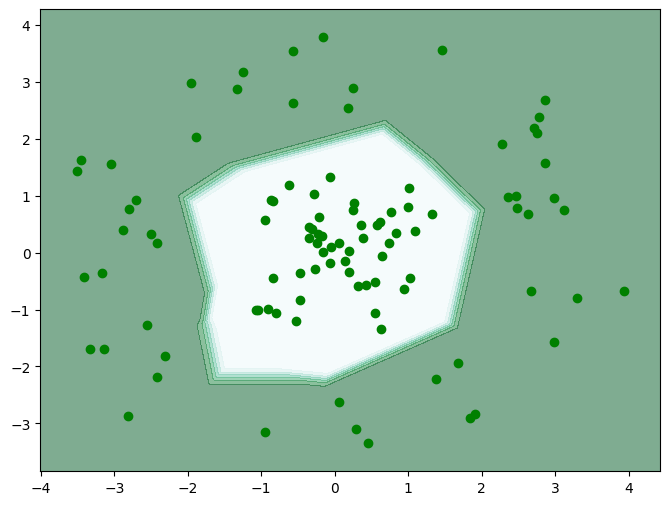

In [56]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds.data.reshape(xx.shape), cmap='BuGn', alpha=0.5)
plt.scatter(X[:200, 0], X[:200, 1], c='green', label='Class 0')
plt.scatter(X[200:, 0], X[200:, 1], c='grey', label='Class 1')
plt.show()